#### Deteksi Marka Jalan

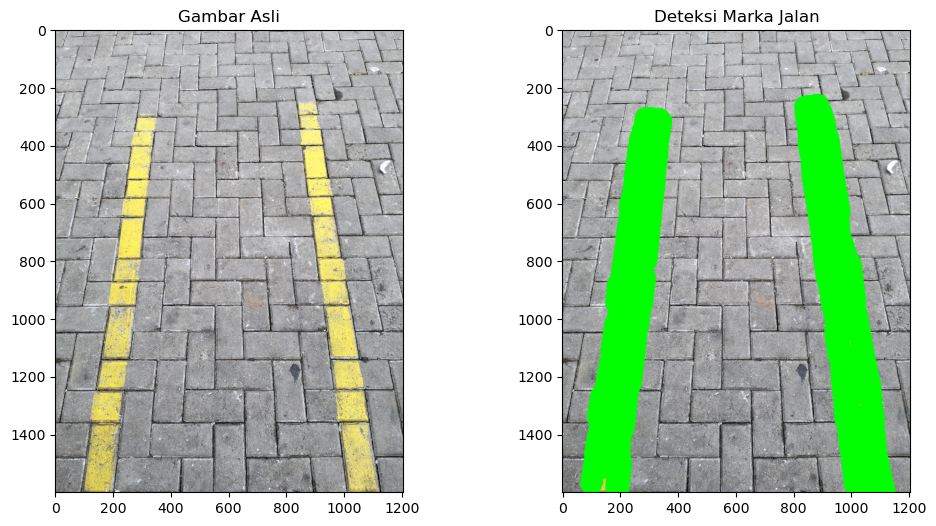

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("Garis Parkiran.jpg")

image_asli = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

blurred_frame = cv2.GaussianBlur(image, (5, 5), 0)
hsv = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2HSV)

lower_yellow = np.array([20, 100, 100], dtype=np.uint8)
upper_yellow = np.array([30, 255, 255], dtype=np.uint8)

mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
edges = cv2.Canny(mask, 74, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, maxLineGap=50)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 75) 

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image_asli)
ax[0].set_title('Gambar Asli')

ax[1].imshow(image_rgb)
ax[1].set_title('Deteksi Marka Jalan')

plt.show()